In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kontrol import *
from control import *
import dtt2hdf

In [ ]:
items = dtt2hdf.read_diaggui('./data/BS_IP_noise_20200721.xml')
f = items.results.PSD['K1:VIS-BS_IP_BLEND_ACCL_IN1'].FHz
noise_lvdtl_data = items.results.PSD['K1:VIS-BS_IP_BLEND_LVDTL_IN1'].PSD[0]
noise_geol_data = items.results.PSD['K1:VIS-BS_IP_BLEND_ACCL_IN1'].PSD[0]

In [ ]:
noise_lvdtl

Text(0.5, 0, 'Frequency (Hz)')

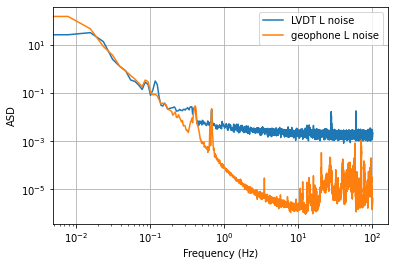

In [14]:
plt.loglog(f, noise_lvdtl_data, label='LVDT L noise')
plt.loglog(f, noise_geol_data, label='geophone L noise')
plt.legend(loc=0)
plt.grid()
plt.ylabel('ASD')
plt.xlabel('Frequency (Hz)')

In [49]:
def make_weight(x, *segments, default_weight=1.):
    """Make weighting functions for data fitting
    
    Parameters
    ----------
        x: list or np.ndarray
            The data points for evaluation
        *segments: tuples of (tuple of (float, float), float)
            Set weights values for segments of the data. 
            The first entry specify the bound of the segment.
            The second entry specify the weight of the segment.
            Use np.inf for unbounded segments.
        default_weight: float, optional
            The default value of the weighting function.
            Defaults to be 1.
    
    Returns
    -------
        weight: np.ndarray
            The weighting function as specfied.
    """

    weight = np.ones_like(x) * default_weight
    
    for seg in segments:
        lower = seg[0][0]
        upper = seg[0][1]
        weight_val = seg[1]
        if lower > upper:
            _ = lower
            lower = upper
            upper = _
        mask_bool = (x >= lower) & (x <= upper) 
        mask_value = mask_bool * weight_val
        weight *= np.logical_not(mask_bool)
        weight += mask_value
    
    return(weight)

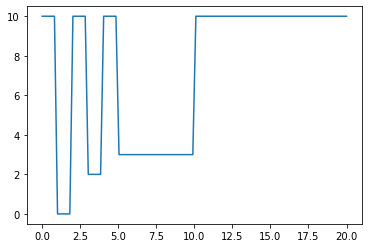

In [54]:
x = np.linspace(0,20, 100)
weight = make_weight(x, ((1, 2), 0), ((3, 4), 2), ((5, 10), 3), default_weight=10)
plt.plot(x, weight)
# plt.plot(weight)

In [37]:
a=[1,2,3,4]
a[1:3]=[4,5]
a

[1, 4, 5, 4]

In [45]:
mask=(f>0)&(f<10)
f*np.logical_not(mask)

array([  0.        ,   0.        ,   0.        , ...,  99.99218628,
        99.99999939, 100.0078125 ])